In [2]:
import pandas as pd
import numpy as np

In [6]:
obj = pd.read_csv('spam.csv', encoding='Windows-1252')
df = pd.DataFrame(obj)
display(df.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [13]:
#DRop last 3 columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , inplace = True)

In [15]:
display(df.head())

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
display(df.head())

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
display(df.head())

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [23]:
# check for duplicate values
df.duplicated().sum()

403

In [25]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [27]:
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [33]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

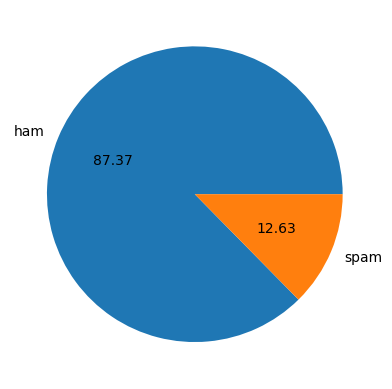

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [39]:
# count the number of characters in each sentene
df['num_chars'] = df['text'].apply(len)
display(df.head())

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
import nltk

In [43]:
!pip install nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Anurag
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
display(df.head())

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [49]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
display(df.head())

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
# ham
df[df['target'] == 0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [55]:
# spam
df[df['target'] == 1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

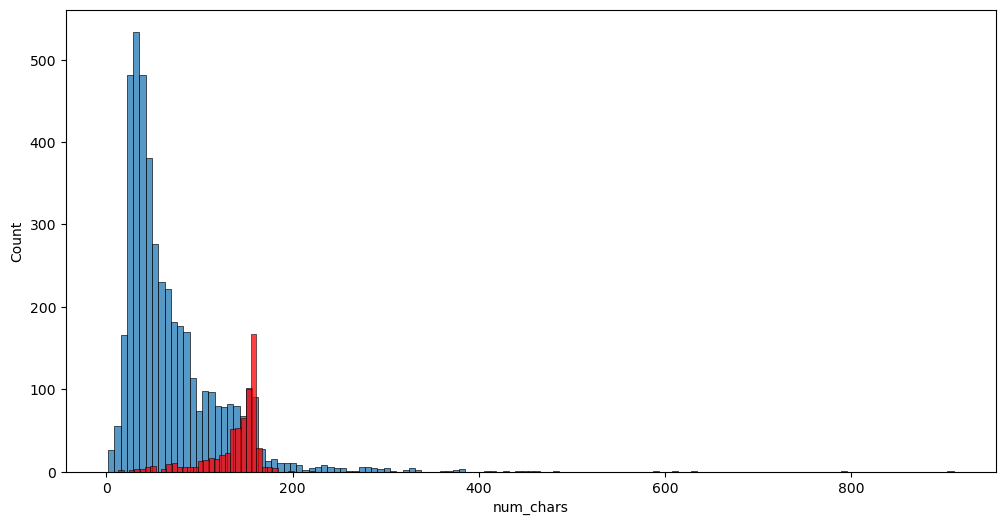

In [57]:
# plotting histogram for both spam and ham classes for number of characters
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

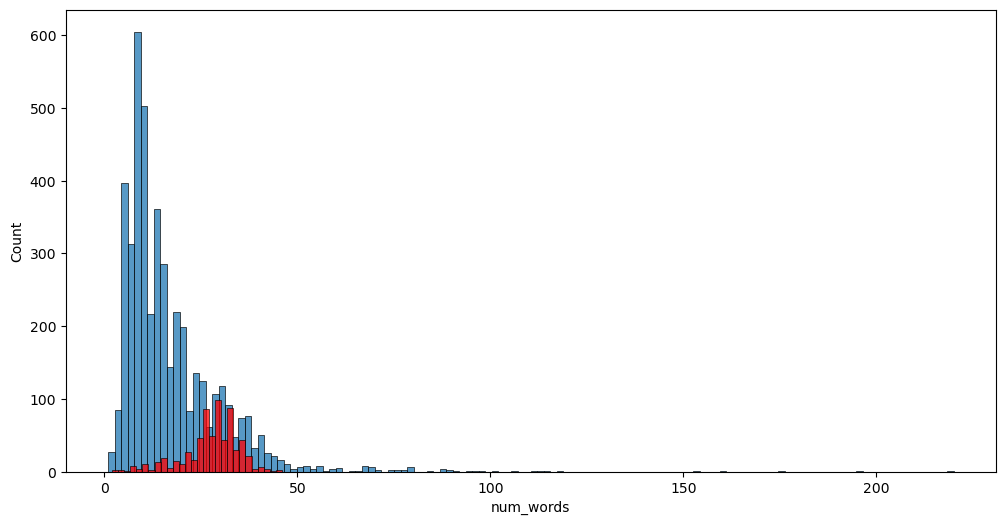

In [59]:
# plotting histogram for both spam and ham classes for number of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

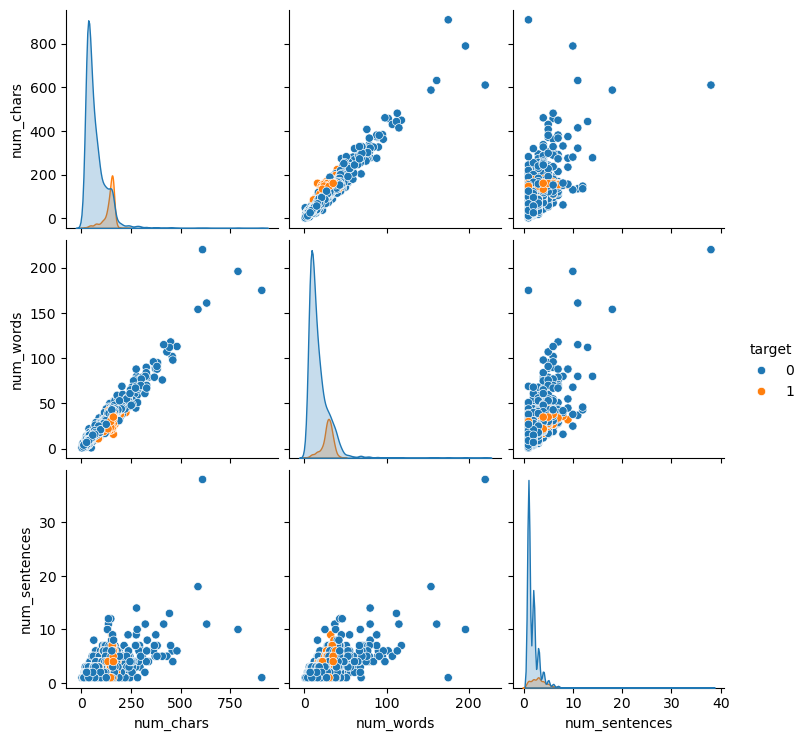

In [61]:
# let's see how these columns are related to each other 
sns.pairplot(df,hue='target')

<Axes: >

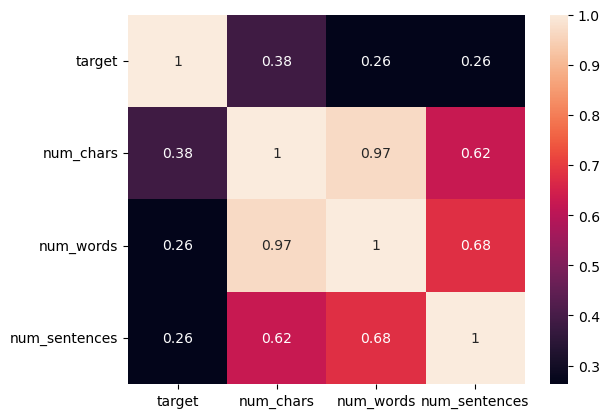

In [63]:
# A heat map to see the correlation 
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Preprocessing
* Convert into Lowercase
* Tokenization
* Removing Special Characters
* Removing Stop Words and Punctuation
* Stemming

In [66]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [68]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [72]:
def transform_text(text):
    text = text.lower()                       # convert text to lowercase
    text = nltk.word_tokenize(text)           # Tokenization
    
    y = []
    for i in text:
        if i.isalnum():                       # checking if the character is alphanumeric (or removing special characters)
            y.append(i)
    
    text = y[:]                                 # creating a shallow copy of the list y and assigns it to the variable text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:          # Removing stopwords and punctuations
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))                               # stemming
    
            
    return " ".join(y)

In [74]:
# example :-
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [76]:
df['transformed_text'] = df['text'].apply(transform_text)
display(df.head())

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [78]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


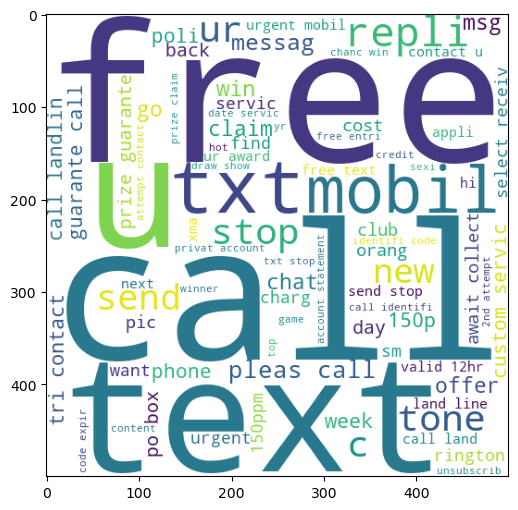

In [80]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

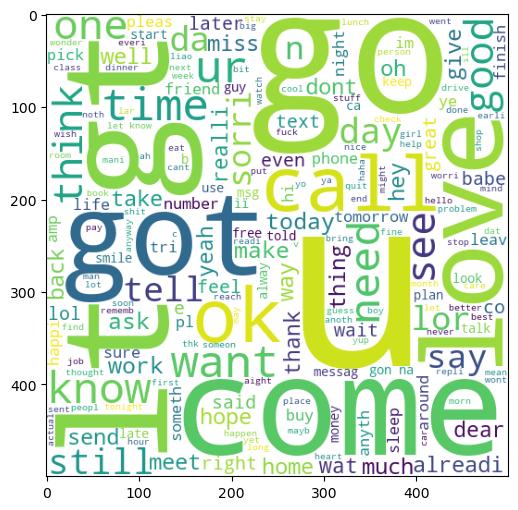

In [82]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [84]:
display(df.head())

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [88]:
len(spam_corpus)                 # by combining all the spam messages there are 9939 words 

9939

# Model Building

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [93]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [95]:
y = df['target'].values

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [99]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# Model 1: Naive Bayes

In [102]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [104]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [106]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [108]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# Model 2: Logistic Regression

In [111]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(precision_score(y_test,lr_pred))

0.9564796905222437
[[894   2]
 [ 43  95]]
0.979381443298969


# Model 3: Support Vector Machine

In [114]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(accuracy_score(y_test,svm_pred))
print(confusion_matrix(y_test,svm_pred))
print(precision_score(y_test,svm_pred))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737


# Model 4: Random Forest

In [117]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(precision_score(y_test,rf_pred))

0.9738878143133463
[[894   2]
 [ 25 113]]
0.9826086956521739


# Model 5: Extra Trees Classifier

In [120]:
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
et_pred = et_model.predict(X_test)
print(accuracy_score(y_test,et_pred))
print(confusion_matrix(y_test,et_pred))
print(precision_score(y_test,et_pred))

0.9787234042553191
[[893   3]
 [ 19 119]]
0.9754098360655737


# Model 6: K-Neighbors Classifier

In [123]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(precision_score(y_test,knn_pred))

0.9052224371373307
[[896   0]
 [ 98  40]]
1.0


# Model 7: XGBoost Classifier

In [126]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(accuracy_score(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
print(precision_score(y_test,xgb_pred))

0.9709864603481625
[[890   6]
 [ 24 114]]
0.95


In [128]:
clfs = {
    'SVC' : svm_model,
    'KN' : knn_model, 
    'NB': mnb,  
    'LR': lr_model, 
    'RF': rf_model,   
    'ETC': et_model,
    'xgb':xgb_model
}

In [130]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [132]:
train_classifier(svm_model,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9754098360655737)

In [134]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  LR
Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.95


In [136]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
4,RF,0.973888,0.982609
3,LR,0.956480,0.979381
0,SVC,0.978723,0.975410
5,ETC,0.978723,0.975410
6,xgb,0.970986,0.950000


In [138]:
import pickle

# Save the model
with open('spam_model.pkl', 'wb') as file:
    pickle.dump(mnb, file)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)